# 배달건수 데이터


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum # 폰트 설치

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
# sns.set(style="whitegrid", font_scale=1, font='Malgun Gothic')

%matplotlib inline

In [ ]:
from matplotlib import font_manager as fm, rc
import matplotlib as mpl
%matplotlib inline
# 한글 처리
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties( fname=path, size=10 )
rc( 'font', family=font.get_name() )
mpl.font_manager._rebuild()

In [ ]:
path = "/content/drive/My Drive/Phoenix/Dacon_Data/delivery.csv"
delivery = pd.read_csv(path)

In [ ]:
delivery=delivery[delivery['DLVR_STORE_SIDO']=='서울특별시'].loc[:,['PROCESS_DT', 'DLVR_STORE_SIGUNGU','DLVR_AMOUNT']]


In [ ]:
delivery=pd.pivot_table(data=delivery, index=['PROCESS_DT'],
                       columns=['DLVR_STORE_SIGUNGU'], aggfunc='count')

In [ ]:
delivery.fillna(0)

DLVR_AMOUNT                  ...                     
DLVR_STORE_SIGUNGU         관악구     구로구     금천구  ...    양천구   영등포구    은평구
PROCESS_DT                                      ...                     
2020-01-01               268.0  2125.0   890.0  ...   91.0  720.0  399.0
2020-01-02                91.0  1378.0   550.0  ...   46.0  626.0  263.0
2020-01-03               153.0  1684.0   671.0  ...   67.0  758.0  307.0
2020-01-04               202.0  2049.0   867.0  ...   67.0  831.0  387.0
2020-01-05               249.0  2076.0   901.0  ...   71.0  840.0  408.0
...                        ...     ...     ...  ...    ...    ...    ...
2020-06-10               146.0  1818.0   834.0  ...   79.0  746.0  368.0
2020-06-11               133.0  1564.0   766.0  ...   74.0  727.0  303.0
2020-06-12               173.0  1867.0   838.0  ...  110.0  817.0  359.0
2020-06-20               310.0  1966.0   950.0  ...  161.0  845.0  452.0
2020-06-21               372.0  2134.0  1101.0  ...  162.0  871.0  440.0

[165 rows x 11 columns]

In [ ]:
delivery.columns = [i for _, i in delivery.columns]

In [ ]:
sum_delivery = pd.DataFrame(index=delivery.index, columns=['delivery_sum'])
for idx in list(delivery.index):
  sum_delivery.loc[idx] = np.sum(delivery.loc[idx])

In [ ]:
sum_delivery[:-2]

,delivery_sum
PROCESS_DT,
2020-01-01,5455
2020-01-02,3491
2020-01-03,4341
2020-01-04,5270
2020-01-05,5374
...,...
2020-06-08,3849
2020-06-09,3996
2020-06-10,4866


In [ ]:
sum_delivery[47:54]

,delivery_sum
PROCESS_DT,
2020-02-17,3950
2020-02-18,4295
2020-02-19,4213
2020-02-20,4279
2020-02-21,5437
2020-02-22,6947
2020-02-23,6289


<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48176 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45804 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_

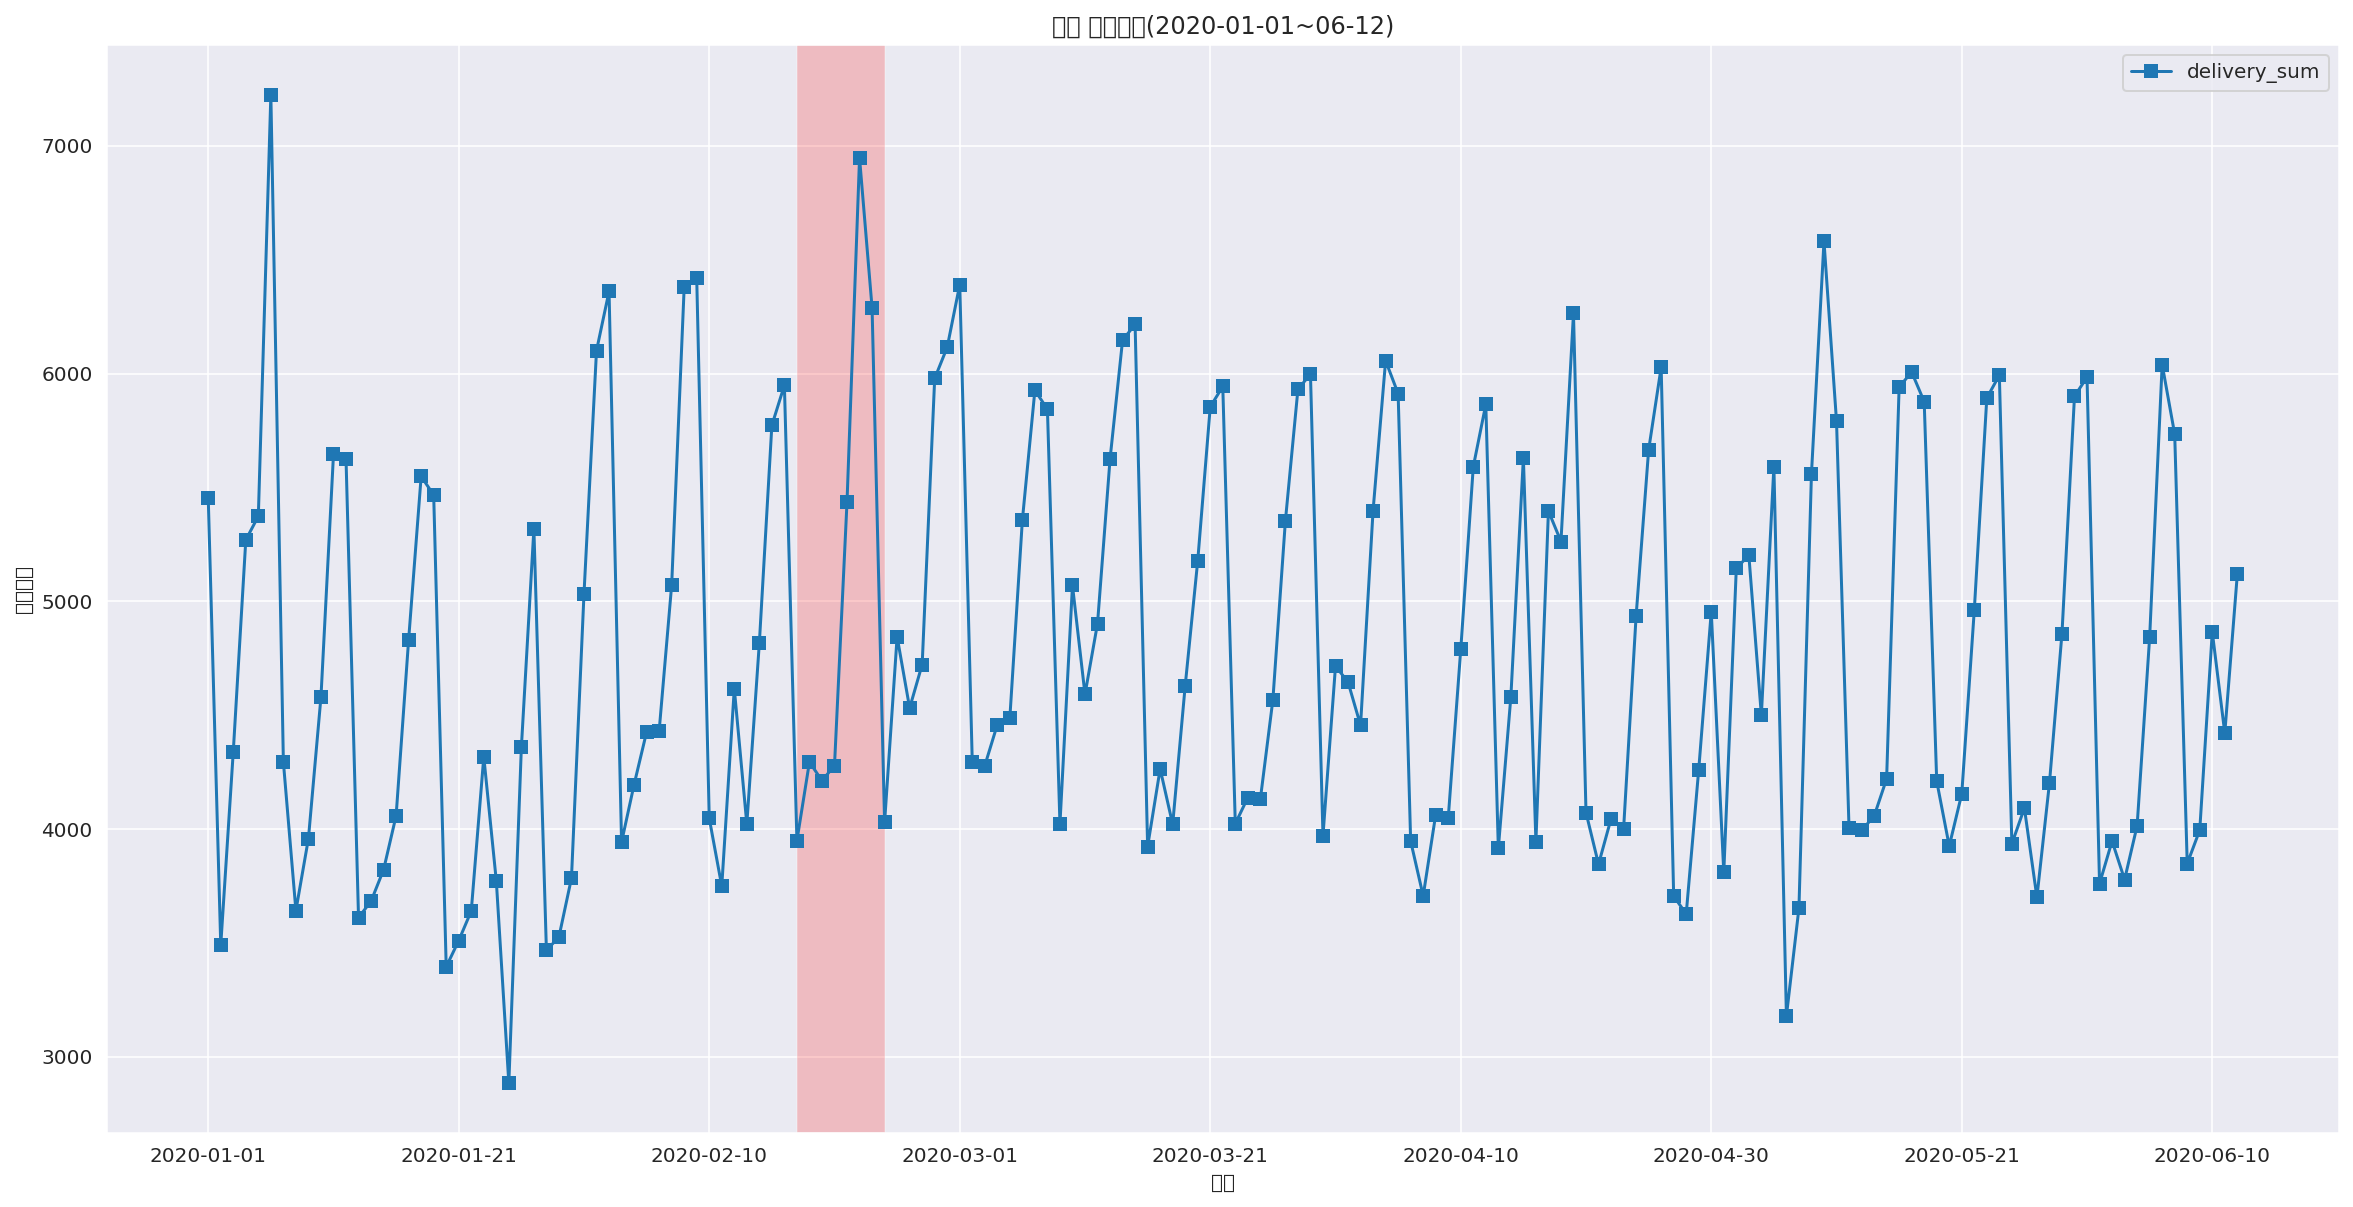

In [ ]:
plt.figure()
sum_delivery[:-2].plot(figsize=(20,10), marker='s')
plt.xlabel('일자')
plt.ylabel('배달건수')
plt.title('일별 배달건수(2020-01-01~06-12)')
plt.axvspan(47, 54, 0, 6000, facecolor='red', alpha=0.2)
# plt.xticks(sum_delivery.index[:-2], rotation=90)
plt.show()

<Figure size 1440x720 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47336 missing from current font.
  font.set_

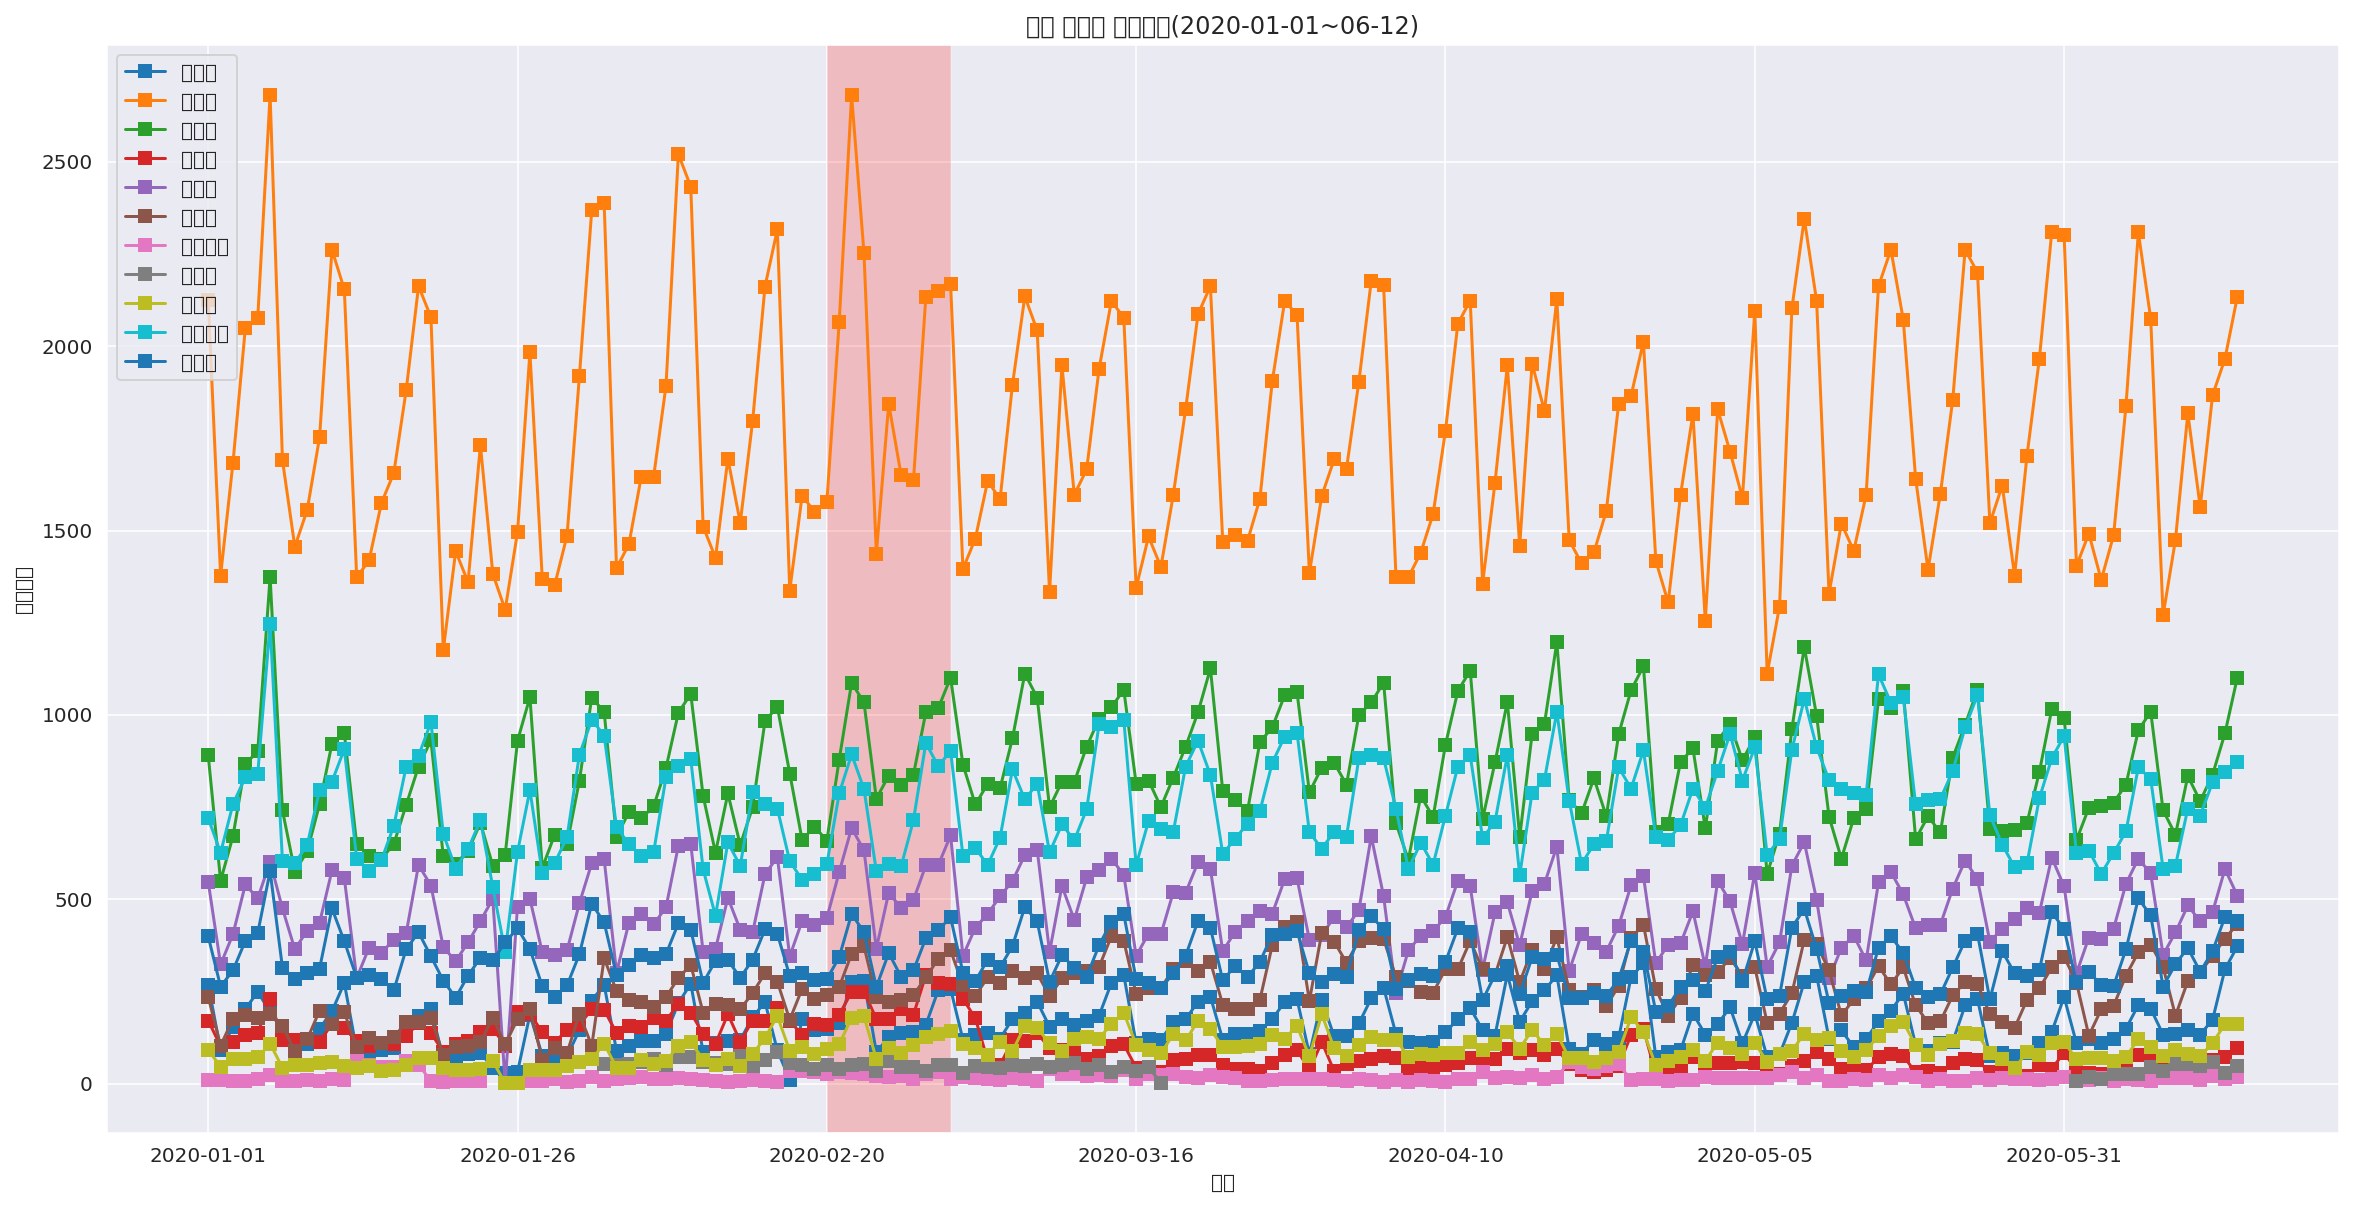

In [ ]:

plt.figure(figsize=(20,10))
# plt.plot(sum_delivery.index[:-2],sum_delivery[:-2])
delivery.plot(figsize=(20,10), marker='s')
plt.xlabel('일자')
plt.ylabel('배달건수')
plt.title('구별 하루당 배달건수(2020-01-01~06-12)')
# plt.xticks(sum_delivery.index[:-2])
# plt.axvspan(facecolor='gray', alpha=0.5)

plt.axvspan(50, 60, 0, 3000, facecolor='red', alpha=0.2)
plt.show()

# 유동인구



In [ ]:
# 데이터 가져오기
path = '/content/drive/My Drive/Phoenix/Dacon_Data/fpopl.csv'
fpop = pd.read_csv(path, encoding='utf-8')


In [ ]:
# 행정정보 데이터 
path = '/content/drive/My Drive/Phoenix/Dacon_Data/adstrd_master.csv'
adstrd_info = pd.read_csv(path, encoding='utf-8')

In [ ]:
# 행정정보 코드 int형으로 바꾸기
adstrd_info['adstrd_code']=adstrd_info['adstrd_code'].apply(lambda x:int(x))

In [ ]:
# 행정코드 기준으로 합치기
fpop = pd.merge(fpop, adstrd_info, on='adstrd_code', how='left')

In [ ]:
fpop.head()

,base_ymd,tmzon_se_code,sexdstn_se_code,agrde_se_code,adstrd_code,popltn_cascnt,adstrd_nm,brtc_nm,signgu_nm
0,20200101,0,M,age_00,11650560,15,반포1동,서울특별시,서초구
1,20200101,0,M,age_00,11590620,6,사당1동,서울특별시,동작구
2,20200101,0,M,age_00,11560710,4,대림2동,서울특별시,영등포구
3,20200101,0,M,age_00,11470680,12,신정7동,서울특별시,양천구
4,20200101,0,M,age_00,11350665,6,상계3.4동,서울특별시,노원구


In [ ]:
cols = ['관악구', '구로구', '금천구', '노원구', '도봉구', '동작구', '서대문구', '서초구', '양천구', '영등포구', '은평구']
fpop_seoul_11 = fpop[fpop['signgu_nm'].isin(cols)]

In [ ]:
fpop_seoul_11['base_ymd'] = fpop_seoul_11['base_ymd'].apply(lambda x:f'{str(x)[:4]}-{str(x)[4:6]}-{str(x)[6:]}')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
fpop_seoul_11 = pd.pivot_table(fpop_seoul_11, index =['base_ymd'],columns=['signgu_nm'],values=['popltn_cascnt'], aggfunc=[np.sum])

In [ ]:
fpop_seoul_11.columns = [i for _,_,i in fpop_seoul_11.columns]

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50501 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52380 missing from current font.
  font.set_

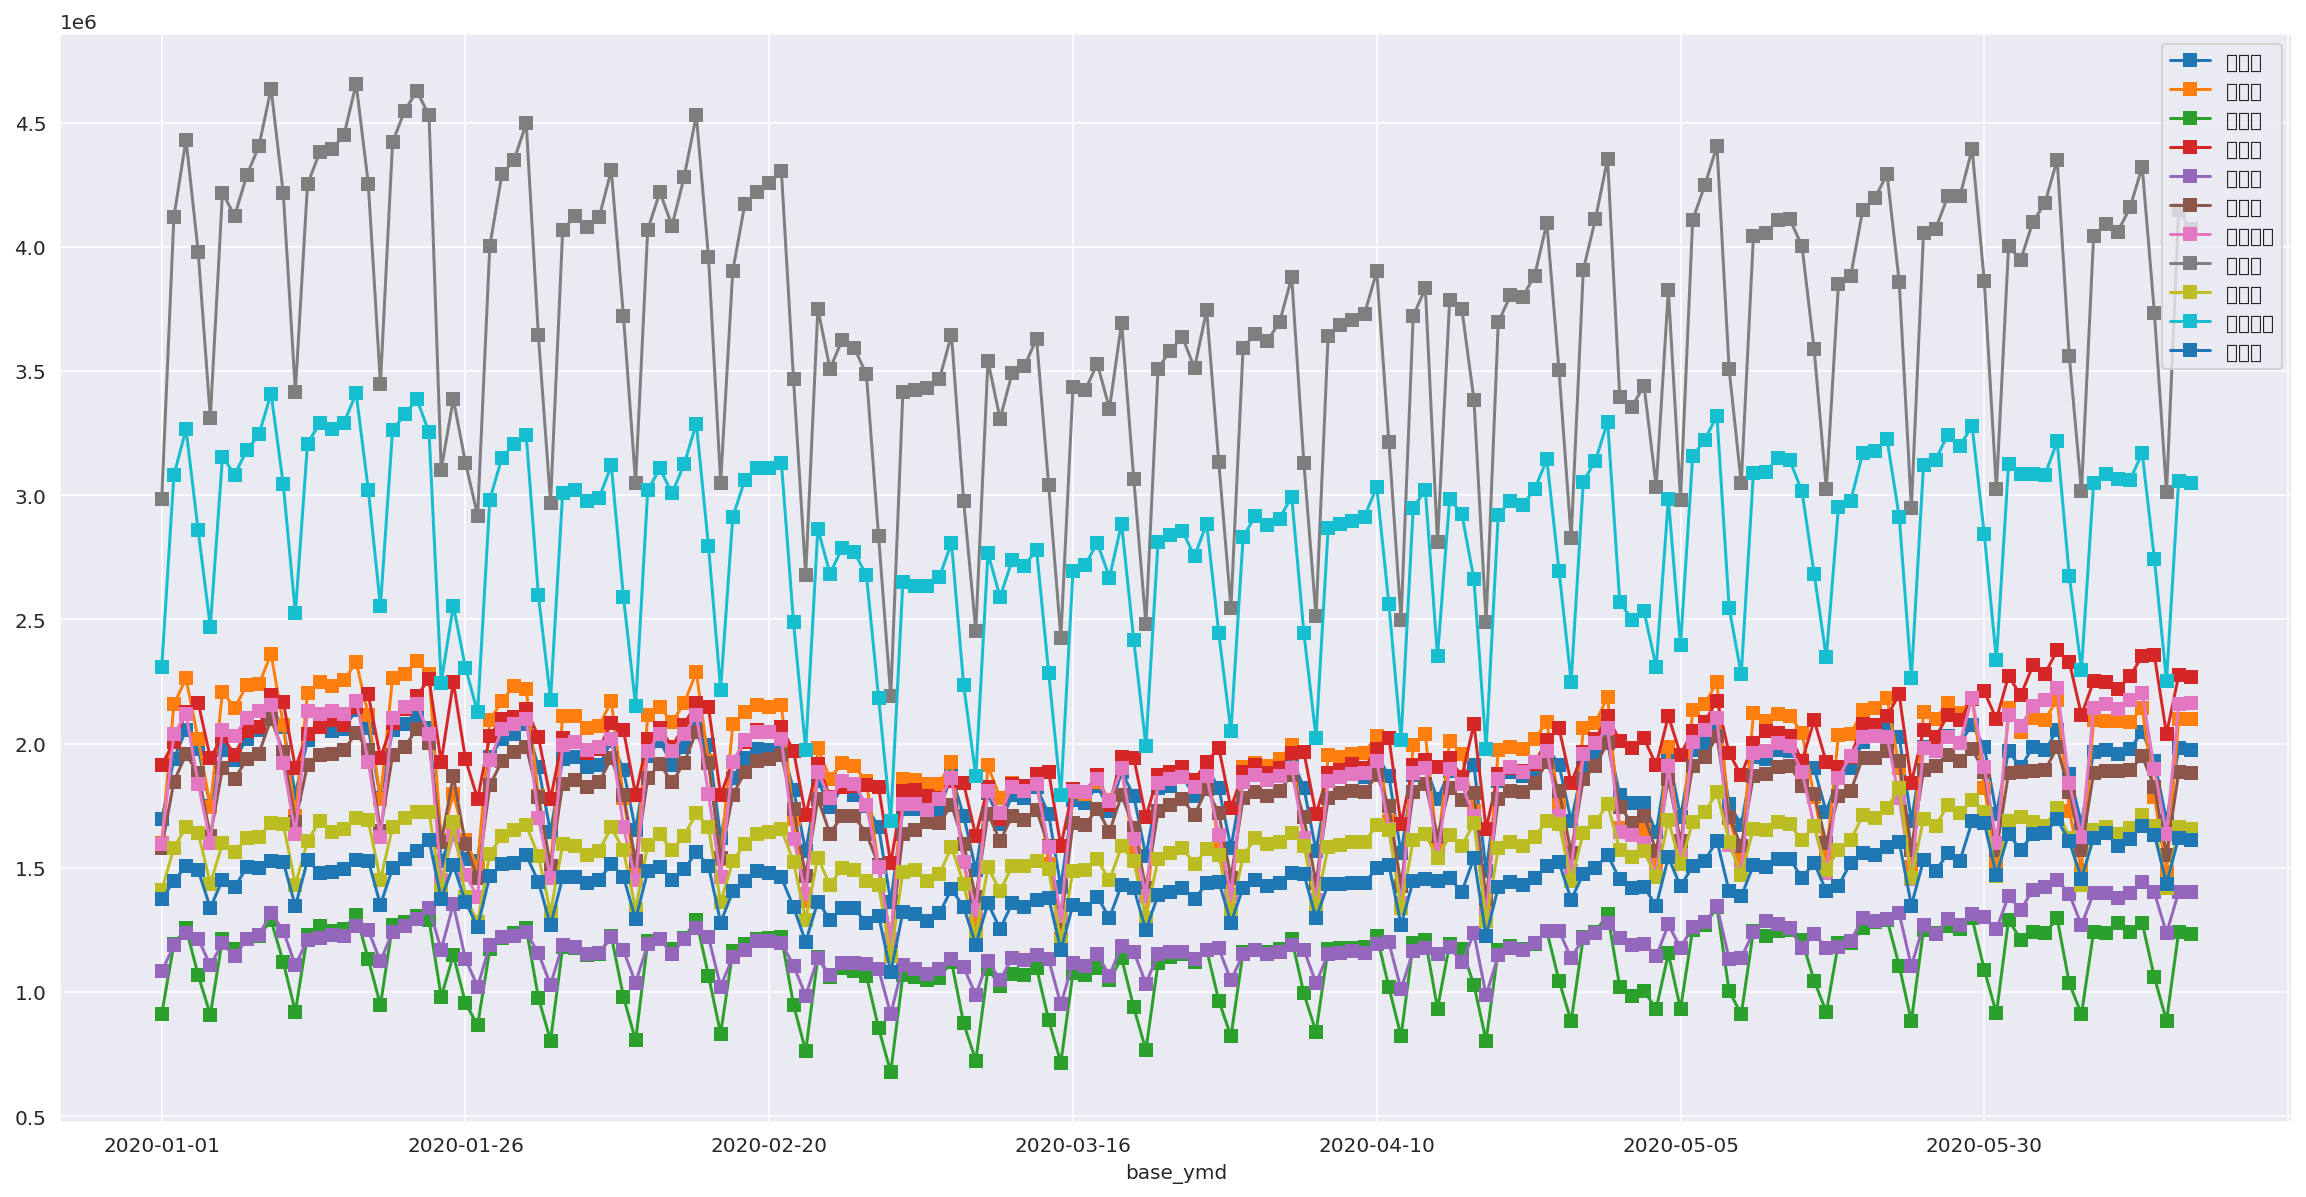

In [ ]:
fpop_seoul_11.plot(figsize=(20,10), marker='s')

In [ ]:
sum_fpop = pd.DataFrame(index=fpop_seoul_11.index, columns=['sum'])
for idx in list(fpop_seoul_11.index):
    sum_fpop.loc[idx]=np.sum(fpop_seoul_11.loc[idx])

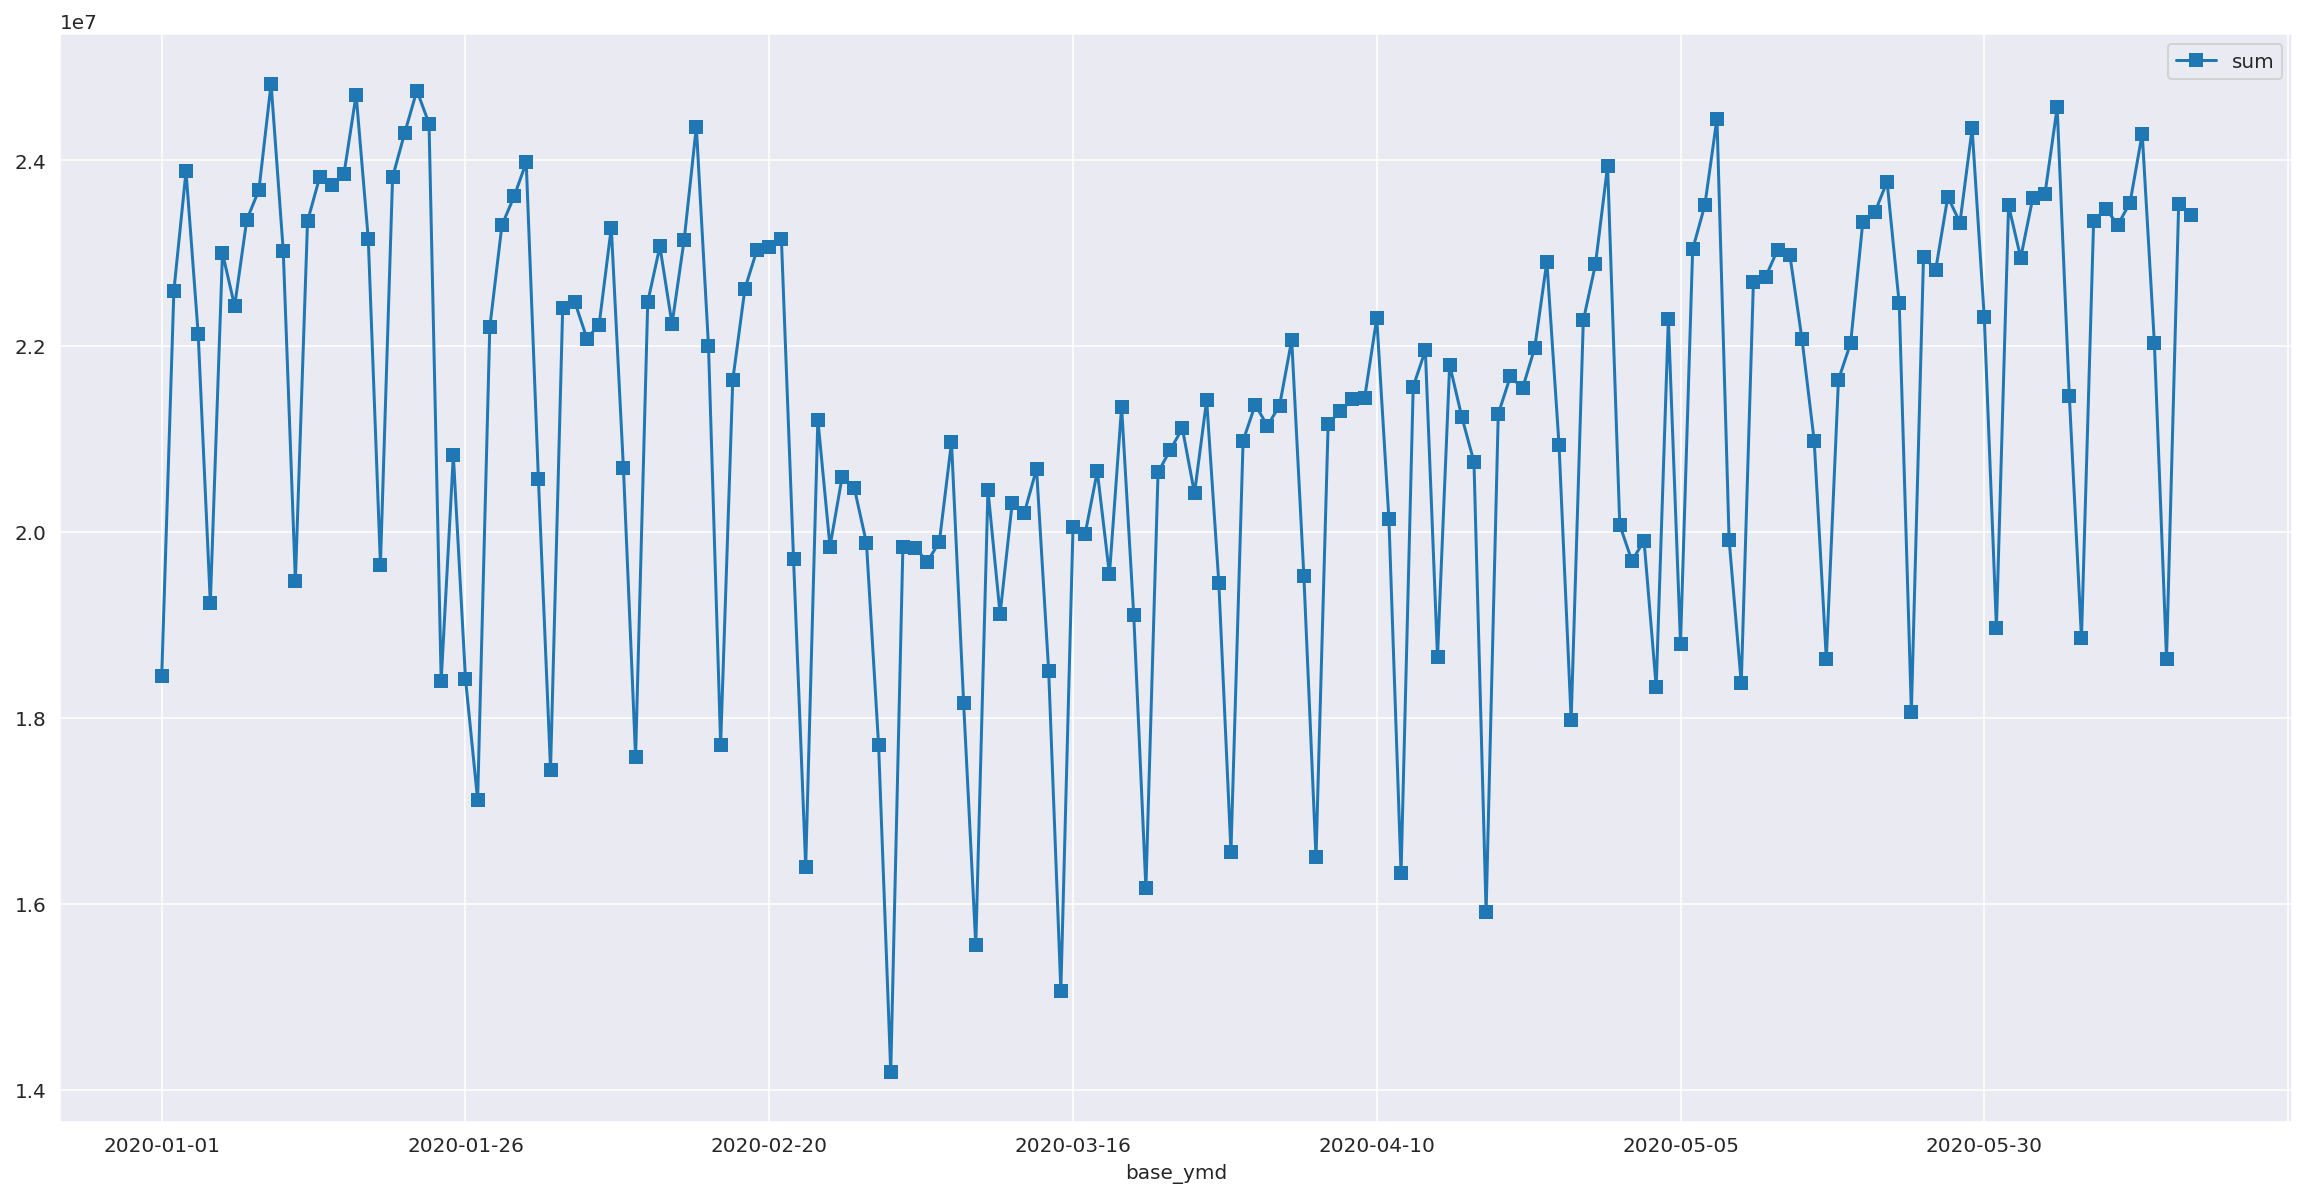

In [ ]:
sum_fpop.plot(figsize=(20,10), marker='s')

# 유동인구와 배달 상관관계 분석

In [ ]:
dic = {
    'base_ymd' : sum_delivery.index,
    'delivery_sum' : sum_delivery['delivery_sum']
}
sum_delivery = pd.DataFrame(dic)
sum_delivery.reset_index(inplace=True, drop=True)

In [ ]:
sum_fpop.head()

,sum
base_ymd,
2020-01-01,18451576
2020-01-02,22595079
2020-01-03,23879505
2020-01-04,22129088
2020-01-05,19234238


In [ ]:
dic = {
    'base_ymd' : sum_fpop.index,
    'fpop_sum' : sum_fpop['sum']
}
sum_fpop = pd.DataFrame(dic)
sum_fpop.reset_index(inplace=True, drop=True)

In [ ]:
delivery_fpop=pd.merge(sum_delivery[:-2], sum_fpop, how='left', on='base_ymd')

In [ ]:
delivery_fpop.columns = ['date', 'delivery_sum', 'fpop_sum']

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48176 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45804 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_

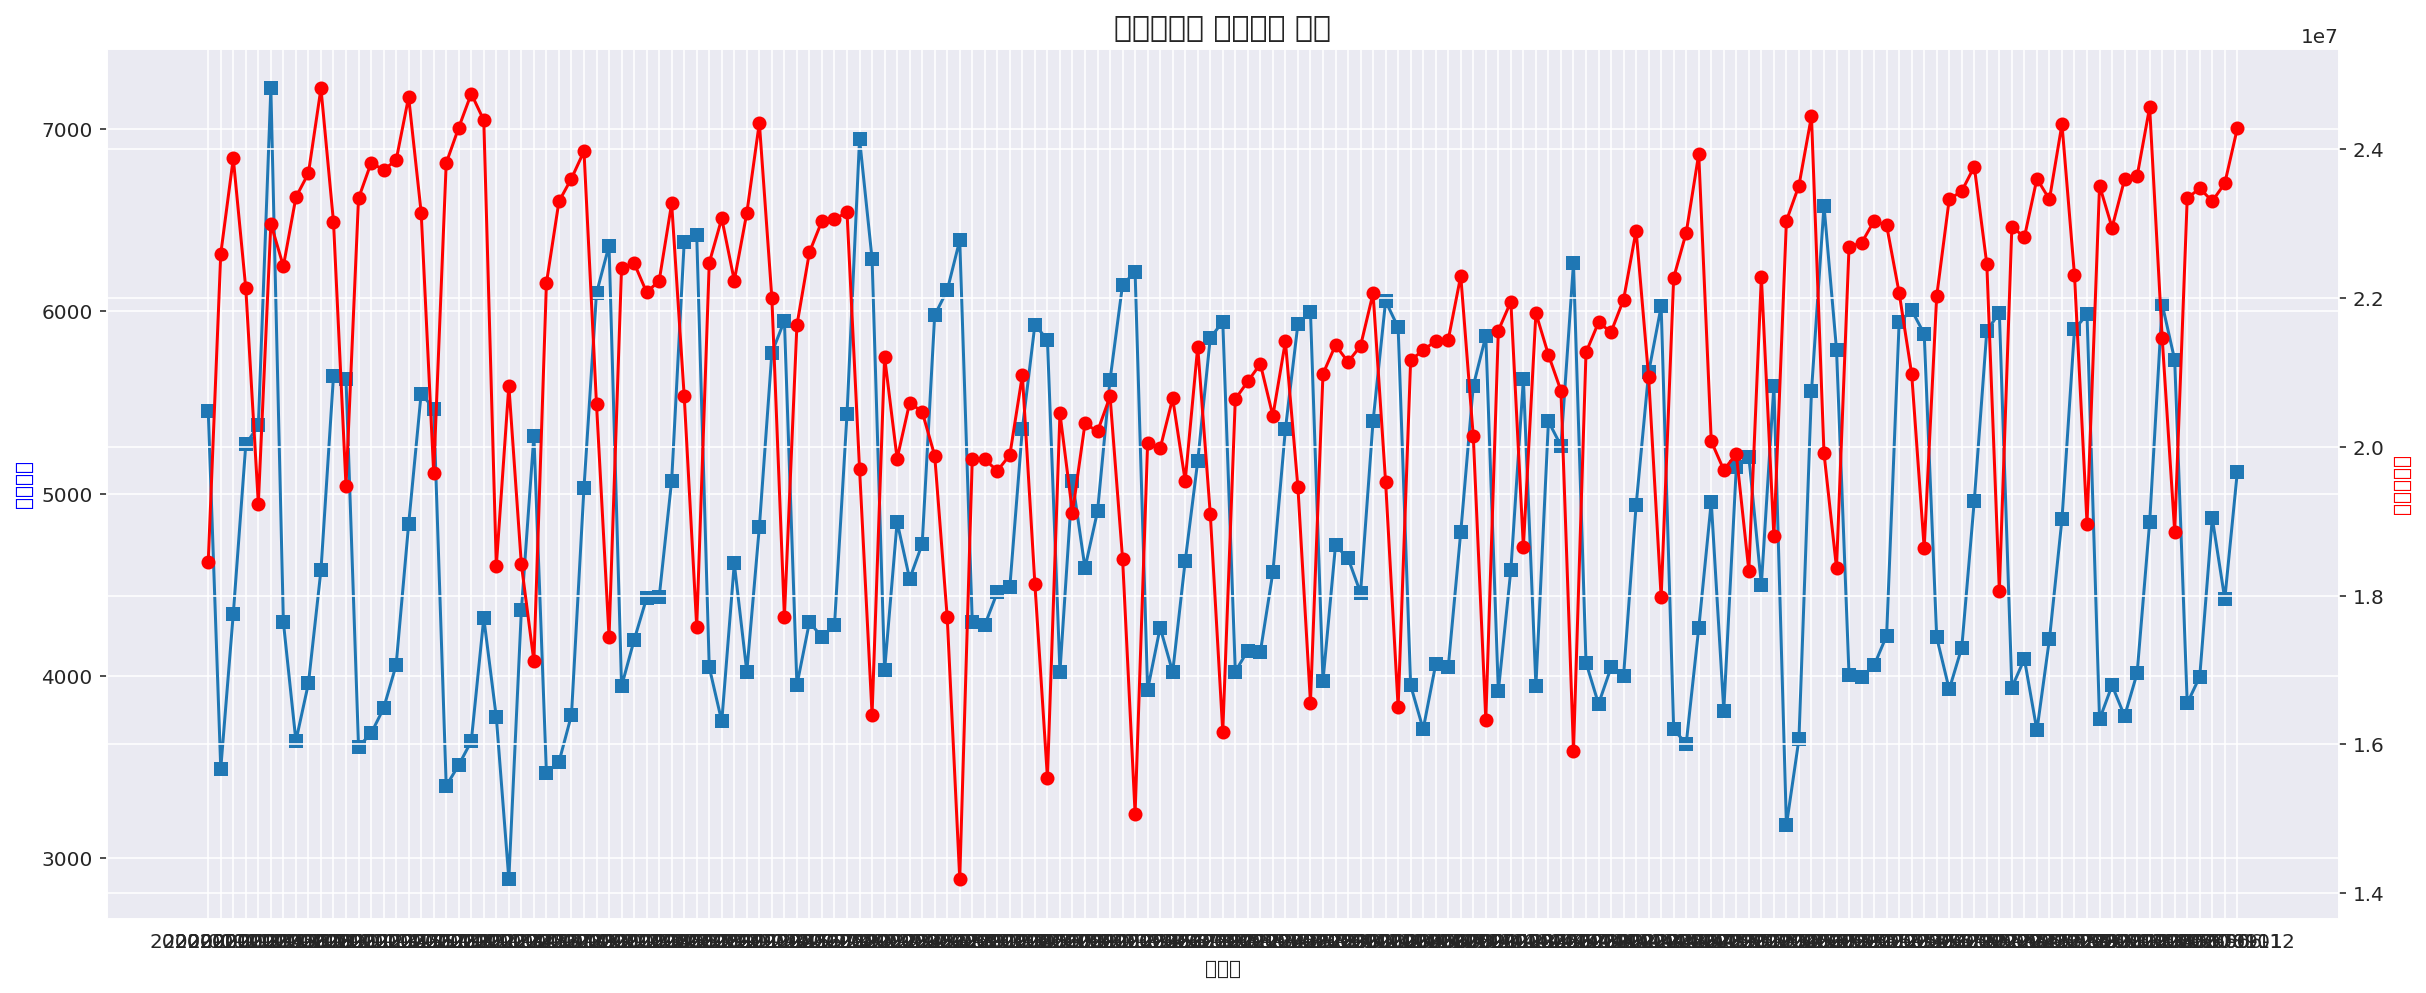

In [ ]:
fg, ax1 = plt.subplots()
fg.set_size_inches(20,8)

ax2 = ax1.twinx()
ax1.plot(delivery_fpop['date'], delivery_fpop['delivery_sum'], marker='s')
ax2.plot(delivery_fpop['date'], delivery_fpop['fpop_sum'], marker='o', color="red" )

ax1.set_xlabel('일자별')

ax1.set_ylabel('배달건수', color='b')
ax2.set_ylabel('유동인구수', color='r')

plt.title('배달건수와 유동인구 비교', size = 15)

plt.show()

In [ ]:
delivery_fpop['delivery_sum']=delivery_fpop['delivery_sum'].apply(lambda x:float(x))
delivery_fpop['fpop_sum']=delivery_fpop['fpop_sum'].apply(lambda x:float(x))
delivery_fpop.dtypes

date             object
delivery_sum    float64
fpop_sum        float64
dtype: object

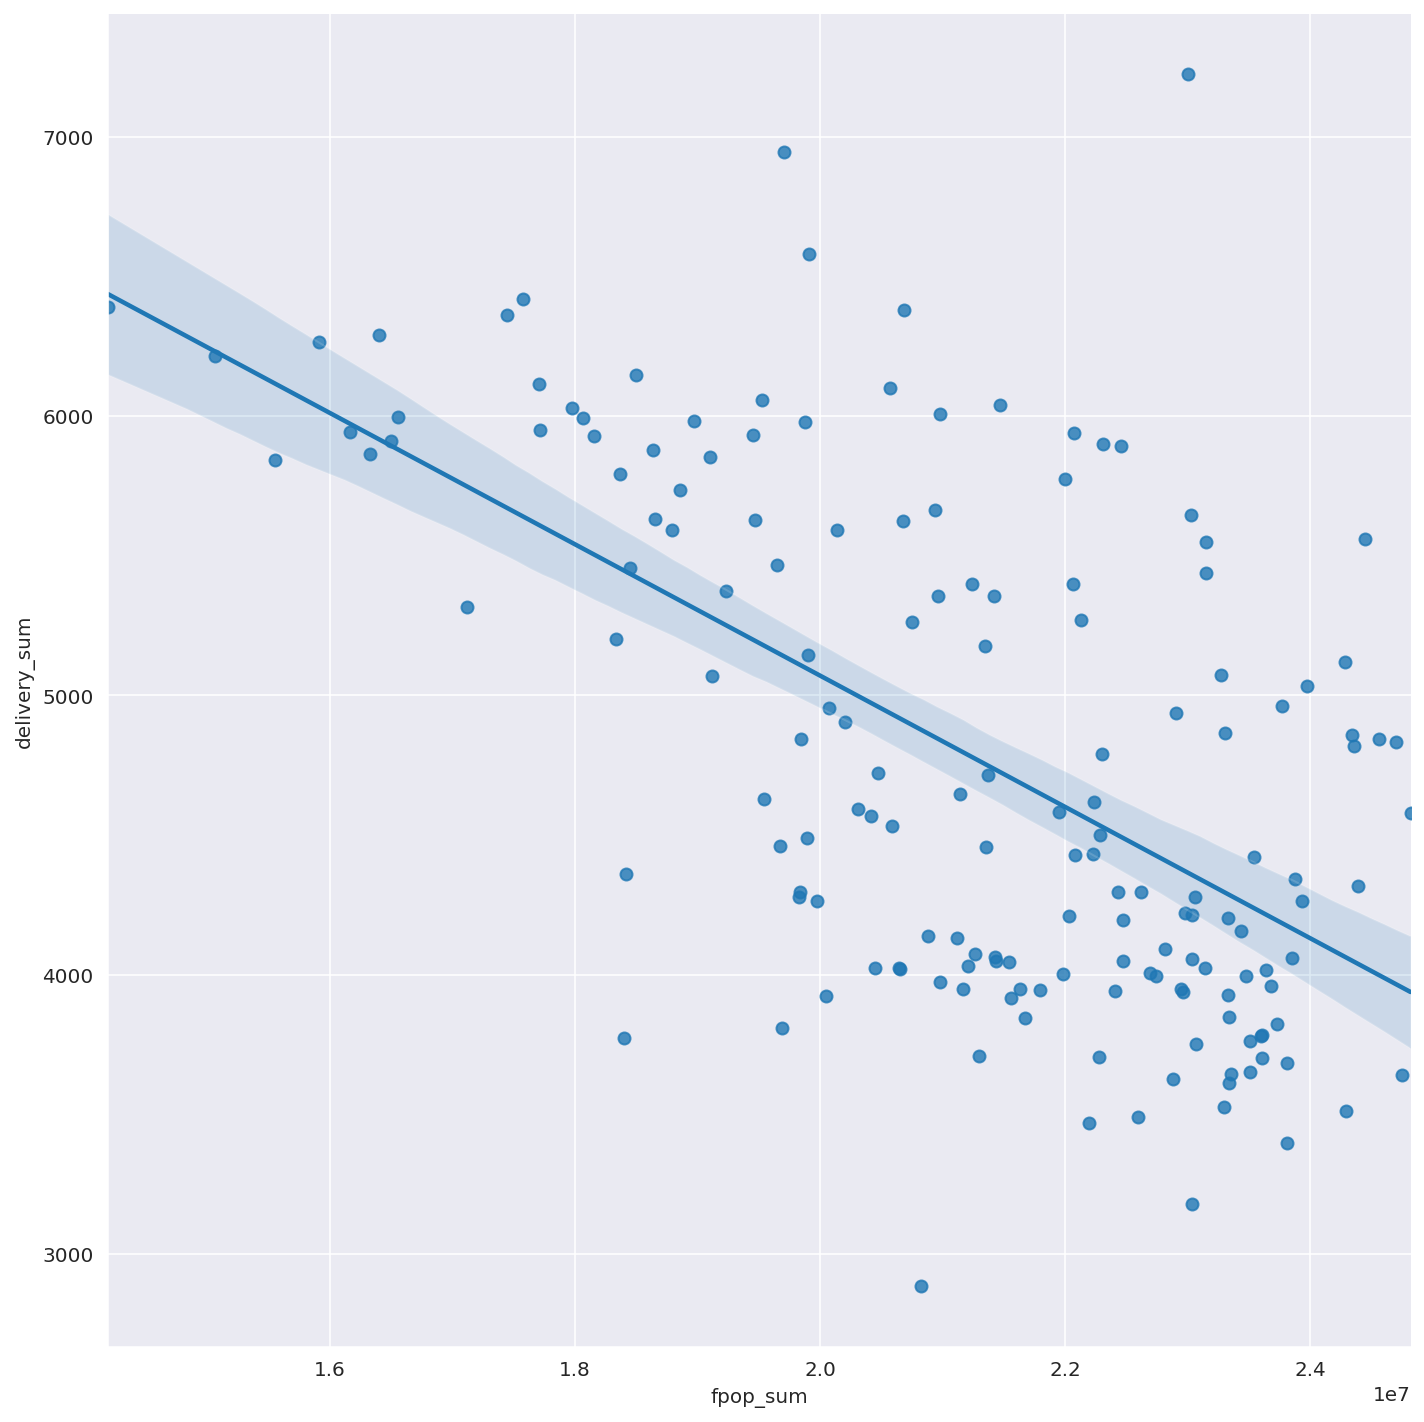

In [ ]:
sns.set_style('darkgrid')
sns.lmplot(x='fpop_sum', y='delivery_sum', data=delivery_fpop, height=10)
plt.show()

In [ ]:
delivery_fpop.iloc[:,:][19:26]

,date,delivery_sum,fpop_sum
19,2020-01-20,3396.0,23815266.0
20,2020-01-21,3511.0,24293143.0
21,2020-01-22,3641.0,24748221.0
22,2020-01-23,4318.0,24392154.0
23,2020-01-24,3773.0,18398472.0
24,2020-01-25,2885.0,20823757.0
25,2020-01-26,4359.0,18419301.0


In [ ]:
weekly_sum = pd.DataFrame(columns=['delivery_sum','fpop_sum'])
a = 1
for i in range(19,138,7):  
  weekly_sum.loc[f'{a}주차']=(np.sum(delivery_fpop.iloc[:,1:][i:i+7]))
  a += 1
weekly_sum

,delivery_sum,fpop_sum
1주차,25883.0,154890314.0
2주차,33593.0,148214148.0
3주차,34868.0,150721344.0
4주차,32977.0,154992833.0
5주차,35410.0,149608641.0
6주차,36616.0,133887053.0
7주차,34651.0,133907165.0
8주차,36576.0,134325500.0
9주차,33816.0,136830094.0
10주차,34146.0,140482117.0


In [ ]:
weekly_sum.loc['18주차']=(np.sum(delivery_fpop.iloc[:,1:][138:144]))

In [ ]:
a = 19
for i in range(144,155,7):  
  weekly_sum.loc[f'{a}주차']=(np.sum(delivery_fpop.iloc[:,1:][i:i+7]))
  a += 1
weekly_sum

,delivery_sum,fpop_sum
1주차,25883.0,154890314.0
2주차,33593.0,148214148.0
3주차,34868.0,150721344.0
4주차,32977.0,154992833.0
5주차,35410.0,149608641.0
6주차,36616.0,133887053.0
7주차,34651.0,133907165.0
8주차,36576.0,134325500.0
9주차,33816.0,136830094.0
10주차,34146.0,140482117.0


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48176 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45804 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_

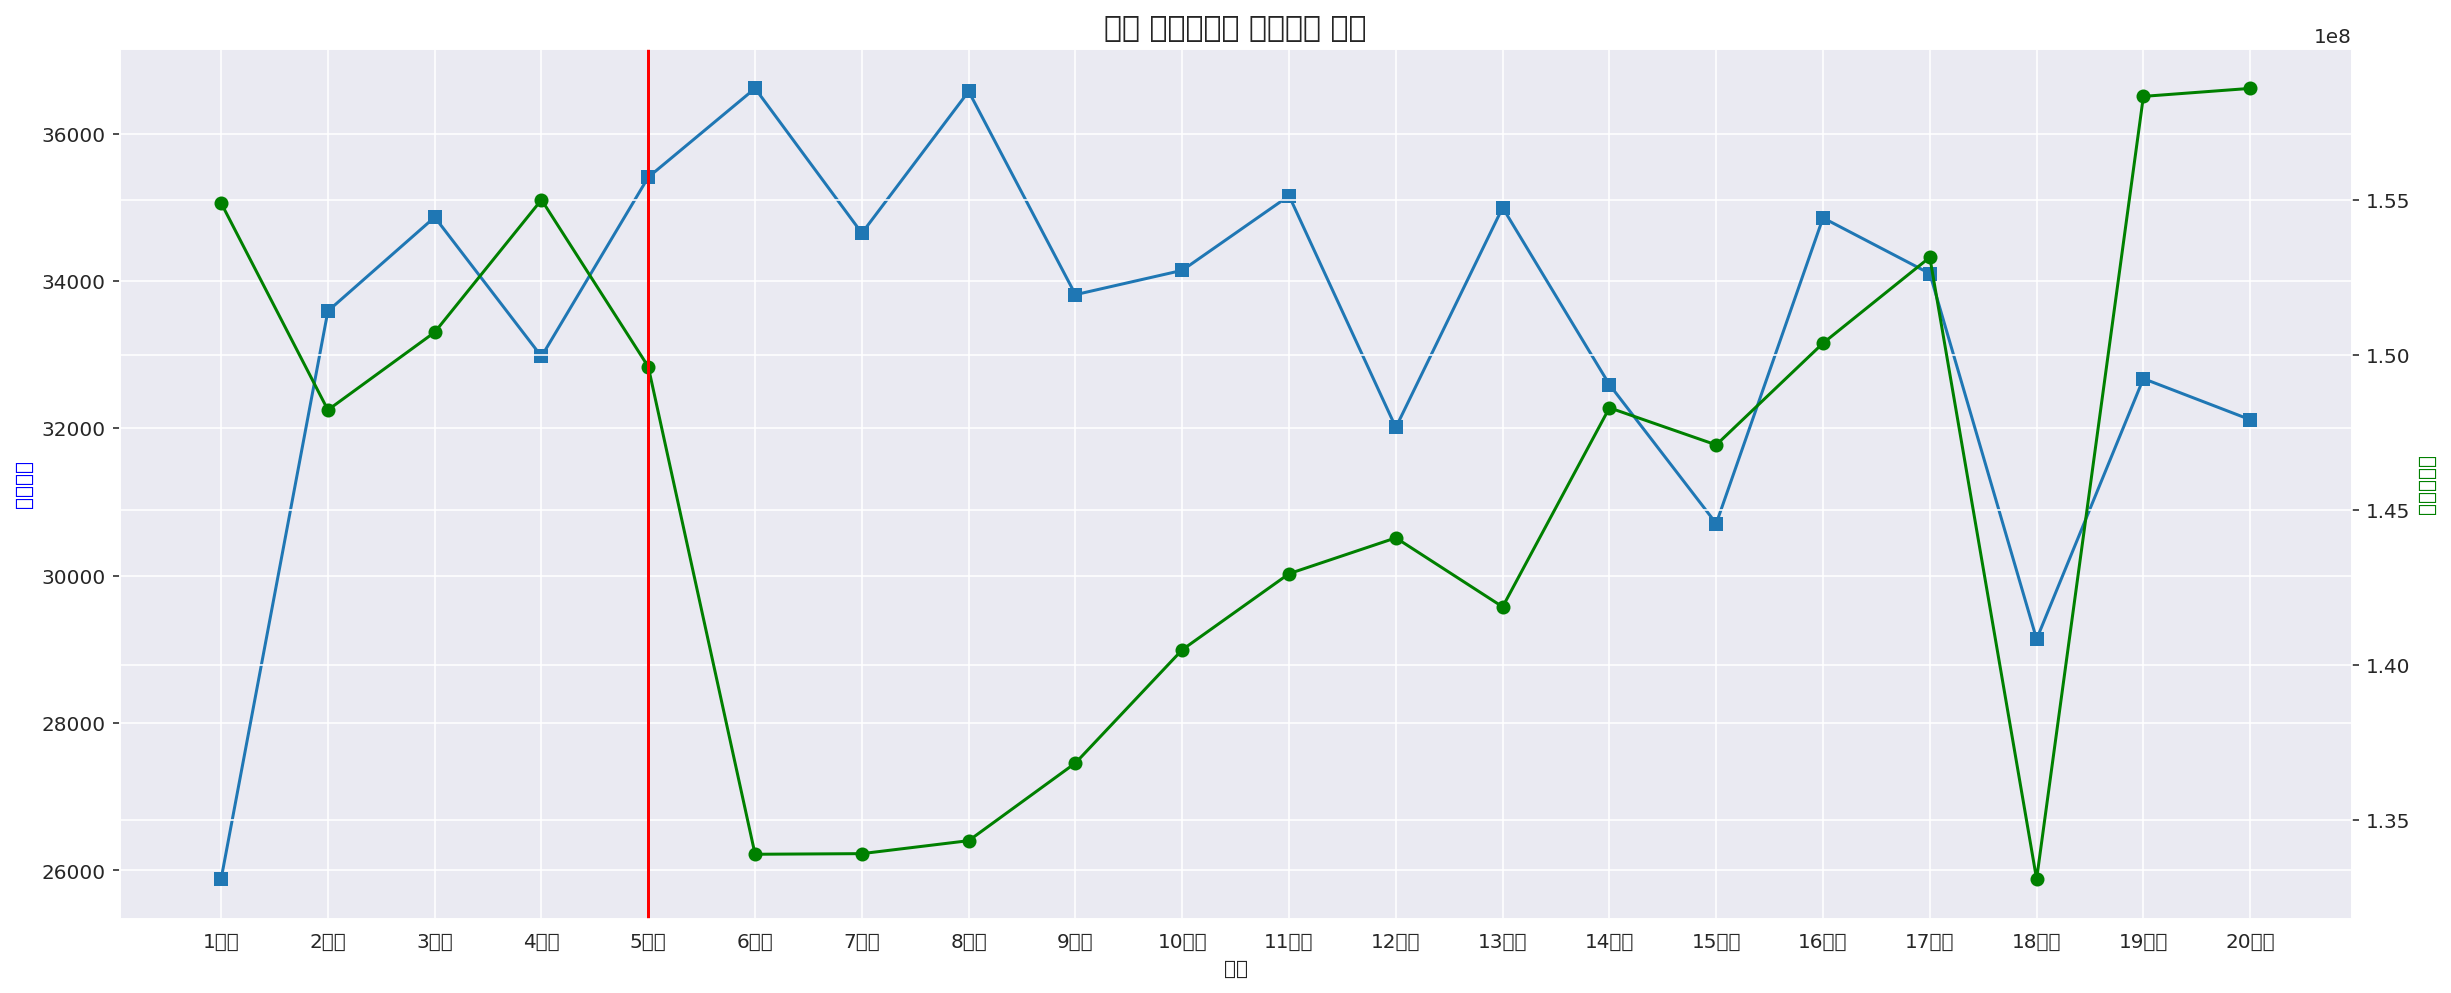

In [ ]:
#20주차에 5월 18일 데이터가 빠져있음
fg, ax1 = plt.subplots()
fg.set_size_inches(20,8)

ax2 = ax1.twinx()
ax1.plot(weekly_sum.index, weekly_sum['delivery_sum'], marker='s')
ax2.plot(weekly_sum.index, weekly_sum['fpop_sum'], marker='o', color="green" )

ax1.set_xlabel('주차')

ax1.set_ylabel('배달건수', color='b')
ax2.set_ylabel('유동인구수', color='green')

plt.axvline(x='5주차', color = 'r')

plt.title('주별 배달건수와 유동인구 비교', size = 15)

plt.show()

In [ ]:
import statsmodels.api as sm

In [ ]:
weekly_sum

,delivery_sum,fpop_sum
1주차,25883.0,154890314.0
2주차,33593.0,148214148.0
3주차,34868.0,150721344.0
4주차,32977.0,154992833.0
5주차,35410.0,149608641.0
6주차,36616.0,133887053.0
7주차,34651.0,133907165.0
8주차,36576.0,134325500.0
9주차,33816.0,136830094.0
10주차,34146.0,140482117.0


In [ ]:
sm.add_constant(weekly_sum['fpop_sum'])

,const,fpop_sum
1주차,1.0,154890314.0
2주차,1.0,148214148.0
3주차,1.0,150721344.0
4주차,1.0,154992833.0
5주차,1.0,149608641.0
6주차,1.0,133887053.0
7주차,1.0,133907165.0
8주차,1.0,134325500.0
9주차,1.0,136830094.0
10주차,1.0,140482117.0


In [ ]:
model = sm.OLS( weekly_sum['delivery_sum'], sm.add_constant(weekly_sum['fpop_sum']))

In [ ]:
result = model.fit()

In [ ]:
print( result.summary())

                            OLS Regression Results                            
Dep. Variable:           delivery_sum   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     1.996
Date:                Thu, 30 Jul 2020   Prob (F-statistic):              0.175
Time:                        08:19:18   Log-Likelihood:                -183.73
No. Observations:                  20   AIC:                             371.5
Df Residuals:                      18   BIC:                             373.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.742e+04   9981.258      4.751      0.0

In [ ]:
result.rsquared, result.rsquared_adj, result.predict(), result.aic

(0.0998138119703218,
 0.049803468190895206,
 array([32465.46065471, 33110.22123786, 32868.08508441, 32455.559731  ,
        32975.5460186 , 34493.88157931, 34491.93923323, 34451.53791329,
        34209.65305183, 33856.95354148, 33620.03811915, 33508.42739038,
        33723.28880188, 33103.37319313, 33218.9677981 , 32902.15166359,
        32634.73536214, 34571.12624525, 32133.49244379, 32108.56093687]),
 371.45020928252995)

In [ ]:
# 상수, 기울기
result.params

const       47424.221294
fpop_sum       -0.000097
dtype: float64

In [ ]:
delivery_fpop

,date,delivery_sum,fpop_sum
0,2020-01-01,5455.0,18451576.0
1,2020-01-02,3491.0,22595079.0
2,2020-01-03,4341.0,23879505.0
3,2020-01-04,5270.0,22129088.0
4,2020-01-05,5374.0,19234238.0
...,...,...,...
158,2020-06-08,3849.0,23342463.0
159,2020-06-09,3996.0,23475825.0
160,2020-06-10,4866.0,23303125.0
161,2020-06-11,4422.0,23542998.0


In [ ]:
# /content/drive/My Drive/Phoenix/PJM/회귀분석데이터/covid_new.csv
path='/content/drive/My Drive/Phoenix/PJM/회귀분석데이터/covid_new.csv'
covid_daily = pd.read_csv(path)
covid_daily

,Unnamed: 0,date,confirmed,new
0,0,2020-01-20,1,1
1,1,2020-01-21,1,0
2,2,2020-01-22,1,0
3,3,2020-01-23,1,0
4,4,2020-01-24,2,1
...,...,...,...,...
142,142,2020-06-10,11902,50
143,143,2020-06-11,11947,45
144,144,2020-06-12,12002,55
145,145,2020-06-13,12051,49


In [ ]:
covid_daily.columns

Index(['Unnamed: 0', 'date', 'confirmed', 'new'], dtype='object')

In [ ]:
covid_daily.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
covid_delivery_fpop=delivery_fpop.merge(covid_daily,how='left',on='date')

In [ ]:
covid_delivery_fpop= covid_delivery_fpop[19:]

In [ ]:
covid_delivery_fpop.columns

Index(['date', 'delivery_sum', 'fpop_sum', 'confirmed', 'new'], dtype='object')

In [ ]:
tmp = np.corrcoef(covid_delivery_fpop['new'],covid_delivery_fpop['delivery_sum'])
# R²
round(np.sum(np.tril(tmp, k=-1)) ** 2, 4)

0.0436

In [ ]:
tmp = np.corrcoef(covid_delivery_fpop['new'],covid_delivery_fpop['fpop_sum'])
# R²
round(np.sum(np.tril(tmp, k=-1)) ** 2, 4)

0.129